In [85]:
import numpy as np # importing necessary libraries
import pandas as pd
import csv
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize  # necessary libraries for Natural Language Processing
from nltk.corpus import stopwords
import string
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
#training data
train = pd.read_csv('/Users/hardikdudeja/Downloads/train_final (1).csv') #reading the data into pandas dataframe
train

,TITLE,DESCRIPTION,BULLET_POINTS,BRAND,BROWSE_NODE_ID,NODE_ID
0,Get Glamr Burne Loafers Black,For a casual guy that takes pride in staying i...,"[Casuals Shoes,Loafers,Flat Loafers,Mens Loafe...",Get Glamr,368,82
1,TRASE Filo Blue Women Slippers and Flip Flops ...,Make a note to get noticed as you adorn this p...,[Material : Artificial Leather / Rexine (Durab...,TRASE,311,75
2,ARWY Car Stickers ' Torque Racing ' (Size -20 ...,Our Car Stickers Comes In Standard Internation...,[Premium Quality - Automotive Grade High Quali...,ARWY,787,48
3,in-Ear Headphones YR Earphones for Moto G6 Ear...,This light hands free also allows you to take ...,"[In-ear headphones provide comfort, quality, a...",ShopsGeniune,811,40
4,Roshiaaz Checks Pattern Backpack Bags,This school/ casual backpack will keep items c...,"[Style: Casual backpack bags,These backpacks p...",Roshiaaz,1454,96
...,...,...,...,...,...,...
99995,Ana Rugs Industries Floral Carpet for Living R...,The Unmatched softness of Silk and Viscose thr...,"[Persian Design carpet,Binding on edge and can...",Ana Rugs Industries,324,22
99996,Generic Electric Head Massager Helmet Scalp Br...,"Features: Adopts smart physical, micro compute...","[Features: Adopts smart physical, micro comput...",Generic,800,60
99997,Silverwala 925 Sterling Silver Plain Locket,An Antique Finishing Lizard Locket made in 925...,[Material: 92.5 Sterling Silver; Color: Silver...,Silverwala,761,59
99998,SellZone Laptop Battery for HP Pavilion 15-BW0...,Picture is for reference only,"[Genuine quality product,Tested before shippin...",SellZone,1163,66


In [4]:
# converting documents into a single text
documents = [] #contains each document in the form of tuple
for i in range(len(train)):  # making a single text paragraph from important attributes
    text = ""
    title = train.iloc[i]['TITLE']
    description = train.iloc[i]['DESCRIPTION']
    points = train.iloc[i]['BULLET_POINTS']
    brand = train.iloc[i]['BRAND']
    class_val = train.iloc[i]['NODE_ID']
    text += brand + " " + title + " " + description + " " + points
    documents.append((text, class_val)) # adding the text into array along with its category in the form of a tuple
    if(i%100 == 0):
        print(i)



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [5]:
# splitting each document into array of words so as to apply necessary processing for NLP
documents_words = [(word_tokenize(document), category) for document, category in documents]

In [6]:
#creating a list of stop words and dictionaries
stops = set(stopwords.words('english'))
punctuations = list(string.punctuation)
stops.update(punctuations)

In [7]:
def get_simple_pos(tag): # returns the simple part of speech that lemmatization takes as input
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    return wordnet.NOUN

In [8]:
lemmatizer = WordNetLemmatizer() # initialising the lemmatizer
def clean_document(words): # cleaning every document, removing stop words ans punctuations
    output_words = []
    for w in words:
        w = w.strip() # removing beginning and trailing spaces
        if w.lower() not in stops and w.isnumeric() == False and w != 'Generic' and len(w) > 2:
            pos = pos_tag([w])
            clean_word = lemmatizer.lemmatize(w, pos = get_simple_pos(pos[0][1])) # lemmatisation of a word
            output_words.append(clean_word.lower()) # adding clean words into a new array
    return output_words

In [9]:
documents_words_clean = []
for i in range(len(documents_words)): # cleaningevery document
    clean_doc = clean_document(documents_words[i][0])
    category = documents_words[i][1]
    documents_words_clean.append((clean_doc, category))
    if(i%100 == 0):
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

KeyboardInterrupt: 

In [10]:
doc_words = [document for document, category in documents_words_clean] # adding final words of a document into list
categories = [category for document, category in documents_words_clean] # adding category of a document into list

In [11]:
# making a single text paragraph from resultant clean words
text_documents = [" ".join(document) for document in doc_words]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
# splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(text_documents, categories, random_state = 0)

In [14]:
# count vectorizer attempt default params
count_vec_1 = CountVectorizer(max_features=2000)
x_train_features_1 = count_vec_1.fit_transform(x_train)
x_test_features_1 = count_vec_1.transform(x_test)
dict_words_1 = count_vec_1.vocabulary_

In [15]:
keys = dict_words_1.keys()
values = dict_words_1.values()
keys = np.array(list(keys))
values = np.array(list(values))

order = np.argsort(values)[::-1]
keys = keys[order]
values = values[order]

for i in range(2000):
    print(keys[i], values[i])



zirconia 1999
zipper 1998
zip 1997
youth 1996
young 1995
you 1994
yoga 1993
yet 1992
yes 1991
yellow 1990
years 1989
year 1988
yarn 1987
yantra 1986
xxl 1985
xl 1984
xiaomi 1983
write 1982
wrist 1981
wrinkle 1980
wrap 1979
woven 1978
would 1977
worth 1976
worry 1975
worn 1974
world 1973
workout 1972
workmanship 1971
work 1970
wool 1969
wooden 1968
wood 1967
wonderful 1966
womens 1965
women 1964
woman 1963
without 1962
within 1961
wish 1960
wireless 1959
wired 1958
wire 1957
wipe 1956
winter 1955
window 1954
wind 1953
wife 1952
width 1951
wide 1950
whole 1949
white 1948
whether 1947
wherever 1946
wheeler 1945
wheel 1944
wet 1943
western 1942
well 1941
welcome 1940
weight 1939
week 1938
wedge 1937
wedding 1936
weave 1935
weather 1934
wearing 1933
wearer 1932
wear 1931
wealth 1930
we 1929
way 1928
watt 1927
waterproof 1926
water 1925
watch 1924
washing 1923
washed 1922
washable 1921
wash 1920
warranty 1919
warm 1918
wardrobe 1917
want 1916
wallpaper 1915
wallet 1914
wall 1913
walk 1912
wa

lord 1032
loose 1031
loop 1030
looks 1029
looking 1028
look 1027
longer 1026
long 1025
london 1024
logo 1023
lock 1022
loafers 1021
loafer 1020
ll 1019
living 1018
live 1017
little 1016
lite 1015
listen 1014
list 1013
liquid 1012
lipstick 1011
lip 1010
lining 1009
liner 1008
linen 1007
line 1006
limited 1005
like 1004
lightweight 1003
lighting 1002
light 1001
lifetime 1000
lifestyle 999
life 998
lid 997
li 996
level 995
letter 994
let 993
less 992
lens 991
lenovo 990
length 989
leggings 988
legging 987
leg 986
left 985
led 984
leave 983
leather 982
leak 981
leaf 980
lead 979
layer 978
latex 977
latest 976
late 975
lasting 974
last 973
large 972
laptops 971
laptop 970
lamp 969
lady 968
ladies 967
lace 966
label 965
lab 964
kurtis 963
kurti 962
kurta 961
kundan 960
krishna 959
known 958
know 957
knit 956
knee 955
kitchen 954
kit 953
king 952
kindly 951
kind 950
kids 949
kid 948
khadi 947
keyboard 946
key 945
kept 944
keeps 943
keep 942
jute 941
juice 940
joy 939
jogging 938
jogger 937
jh

carpets 283
carpet 282
cargo 281
carefully 280
care 279
card 278
carbon 277
carat 276
car 275
capri 274
capacity 273
cap 272
canvas 271
camera 270
call 269
cafe 268
cable 267
buying 266
buyer 265
buy 264
buttons 263
button 262
bust 261
business 260
bumper 259
bump 258
bull 257
bulk 256
bulb 255
built 254
build 253
buddha 252
buckle 251
bubble 250
brush 249
brown 248
brother 247
broken 246
brings 245
bring 244
brilliant 243
bright 242
bridal 241
breathable 240
break 239
brass 238
branded 237
brand 236
bracelet 235
bra 234
br 233
bpa 232
boys 231
boyfriend 230
boy 229
box 228
bottom 227
bottle 226
border 225
boost 224
book 223
bold 222
body 221
board 220
bmw 219
bluetooth 218
blue 217
blouse 216
blood 215
block 214
blend 213
bleach 212
black 211
bit 210
bis 209
birthday 208
bird 207
bio 206
bike 205
big 204
beverage 203
better 202
best 201
benefits 200
benefit 199
belt 198
believe 197
beige 196
bedsheet 195
bedroom 194
bed 193
become 192
beauty 191
beautifully 190
beautiful 189
bear 188


In [16]:
# count vectorizer with different parameters
count_vec_2 = CountVectorizer(max_features = 2000, ngram_range = (1,2), max_df=0.95)
x_train_features_2 = count_vec_2.fit_transform(x_train)
x_test_features_2 = count_vec_2.transform(x_test)

In [17]:
train_data_1 = x_train_features_1.todense()
test_data_1 = x_test_features_1.todense()

In [18]:
train_data_2 = x_train_features_2.todense()
test_data_2 = x_test_features_2.todense()

In [19]:
f1 = np.array(count_vec_1.get_feature_names())
f2 = np.array(count_vec_2.get_feature_names())

In [20]:
# keeping features from second count vetoriser as the final features
f2 = f2[35:]
for ele in f2:
    print(ele)

5mm
75
80
92
able
abstract
access
access button
accessories
accessory
accord
accurate
acer
achieve
across
acrylic
action
active
activity
actual
actual product
adapter
add
addition
additional
adhesive
adjust
adjustable
adorable
adorn
advanced
affordable
age
air
air tight
all
allow
allows
alloy
almost
along
also
also use
always
amaze
amazon
american
american diamond
among
amp
analog
and
android
angle
animal
ankle
ankle length
anniversary
anniversary gift
answer
anti
anti slip
antique
anything
anywhere
apparel
appeal
appearance
apple
apple watch
application
apply
approx
area
around
art
art print
artificial
artisan
artist
artwork
assure
astrological
asus
attach
attention
attire
attractive
audio
authentic
auto
auto detects
automatically
available
available amazon
avoid
away
awesome
ayurvedic
baby
back
back case
back cover
background
backing
backpack
bag
bag prevent
bags
balance
balcony
ball
balloon
balloons
band
bangle
bangles
bar
base
basic
basis
bass
bathroom
battery
beach
bead
beads
bear

well
western
wet
wheel
wheeler
wherever
whether
white
whole
wide
wide range
width
wife
window
winter
wipe
wire
wired
wireless
wish
within
without
woman
woman girl
women
women cotton
women girls
womens
wonderful
wood
wooden
wool
work
workout
world
worn
worry
would
woven
wrap
wrinkle
wrist
write
xiaomi
xiaomi redmi
xl
xxl
year
year warranty
years
yellow
yellow sapphire
yet
yoga
you
young
youth
zip
zipper
zirconia


In [22]:
df_train_2 = pd.DataFrame(data = train_data_2, columns= f2) # saving the data for further use 
df_train_2.to_csv('df_train_2.csv', index = False)
df_test_2 = pd.DataFrame(data = test_data_2, columns= f2)
df_test_2.to_csv('df_test_2.csv', index = False)
np.savetxt('train_data_1.csv', train_data_1, delimiter = ",")
np.savetxt('train_data_2.csv', train_data_2, delimiter = ",")
np.savetxt('test_data_1.csv', test_data_1, delimiter = ",")
np.savetxt('test_data_2.csv', test_data_2, delimiter = ',')
# np.savetxt('f1.csv', f1, delimiter = ",", fmt = '%s')
np.savetxt('f2.csv', f2, delimiter = ",", fmt = '%s')
y_train = np.array(y_train)
y_test = np.array(y_test)
np.savetxt('y_train.csv', y_train, delimiter = ",")
np.savetxt('y_test.csv', y_test, delimiter = ',')

## DATA VISUALISATION

In [23]:
from wordcloud import WordCloud

In [30]:
x_train = pd.read_csv('df_train_2.csv') # reading the x_train
y_train = pd.read_csv('y_train.csv', header = None) # reading the y_train
y_train = np.array(list(y_train[0].values))
y_train = np.array(y_train, dtype = int)


In [31]:
sum_words = x_train.sum(axis=0) 
features = np.array(list(sum_words.keys())) # storing the features 
count = np.array(list(sum_words.values)) # storing the count of features

In [32]:
order = np.argsort(count)[::-1]
features = features[order] # sorting in descending order
count = count[order]

In [33]:
for i in range(len(features)):
    print(features[i], count[i])

size 61276
quality 59717
make 57553
design 53433
material 51706
use 49465
product 45180
wear 42723
color 41982
high 40450
cotton 40056
look 39643
cover 38784
fit 36140
strong 34684
perfect 33951
fabric 32480
style 31394
women 31084
men 30003
gift 29928
inch 29240
easy 28545
soft 26742
casual 26094
type 25633
wash 25507
length 25005
long 23473
skin 23196
water 23078
leather 23012
set 22818
one 22807
high quality 22058
case 21851
free 21611
print 21536
comfortable 21367
best 21117
black 20825
stylish 20749
wall 20361
shirt 20205
day 20085
light 20078
give 20060
li 19744
woman 19597
dress 19334
comfort 18814
phone 18522
home 18257
also 18235
provide 18141
fashion 17870
party 17838
made 17823
back 17795
pair 17324
please 17152
colour 17096
care 16937
shoe 16900
top 16658
dry 16568
keep 16326
occasion 15820
premium 15736
time 15723
sleeve 15564
brand 15413
device 15303
hand 15210
protection 15094
durable 14765
battery 14538
clean 14495
charge 14305
laptop 14288
full 14094
room 13891
well 13

wipe 2018
max 2017
net 2017
universal 2016
satisfaction 2013
case cover 2007
nighty 2005
measure 2001
tea 2000
yoga 1998
navy 1997
fold 1996
mild 1996
longer 1995
secure 1995
room bedroom 1987
tumble 1986
easy access 1985
powder 1984
mesh 1981
connector 1979
carefully 1979
thick 1978
woven 1977
unit 1976
package content 1974
amaze 1973
direct 1973
color black 1973
stitched 1970
change 1967
construction 1965
decorate 1964
finger 1961
fits 1961
clothing 1960
drive 1951
protective 1948
activity 1944
please note 1942
gorgeous 1940
reduce 1935
wrist 1930
extreme 1926
us 1923
vintage 1921
mid 1917
bear 1915
increase 1914
running 1914
pair stylish 1913
months 1911
figure 1911
precise 1909
jewels 1905
ease 1904
synthetic leather 1903
cap 1901
sister 1899
look fabric 1896
sleeveless 1889
main 1889
long sleeve 1885
output 1883
car cover 1881
degree 1876
logo 1875
test 1875
lady 1868
circuit 1864
pure cotton 1856
tumble dry 1853
contemporary 1853
month 1851
fun 1851
ray 1848
man 1846
mic 1845
man

artist 1043
manufacturing defect 1043
gallery 1043
sign 1041
promise 1040
offering 1039
and 1037
bumper 1035
headphones 1034
colours 1034
looking 1030
art print 1030
krishna 1030
mid rise 1028
odorize 1028
diy 1028
leather belt 1028
lifetime 1028
style statement 1027
coin 1026
washed 1023
read 1023
connectors 1023
de odorize 1023
tip 1023
instal 1021
moto 1021
remains 1021
fungus 1020
god 1019
crop 1018
achieve 1018
wool 1017
generation 1017
sides 1016
li strong 1016
something 1016
astrological 1015
stylish shirt 1014
pressure 1013
recommended 1013
statue 1013
temple 1013
blouse piece 1012
boyfriend 1011
sure make 1011
threads 1011
club 1010
cost 1010
trust 1009
apparel 1009
cycle 1008
gear 1008
surface use 1007
hot cold 1005
made cotton 1005
stylish pair 1005
flap 1004
scratch resistant 1004
odour 1003
paste 1003
harmful 1003
lace up 1002
gem 1001
break 1001
sense 998
satisfied 998
enable 997
pull 997
carpets 996
dirt surface 996
type half 995
delivers 995
almost 992
night suit 991
ca

In [34]:
dict_words = {} # adding words and their frequency in a dictionary
for i in range(len(features)):
    dict_words[features[i]] = count[i]
dict_words

{'size': 61276,
 'quality': 59717,
 'make': 57553,
 'design': 53433,
 'material': 51706,
 'use': 49465,
 'product': 45180,
 'wear': 42723,
 'color': 41982,
 'high': 40450,
 'cotton': 40056,
 'look': 39643,
 'cover': 38784,
 'fit': 36140,
 'strong': 34684,
 'perfect': 33951,
 'fabric': 32480,
 'style': 31394,
 'women': 31084,
 'men': 30003,
 'gift': 29928,
 'inch': 29240,
 'easy': 28545,
 'soft': 26742,
 'casual': 26094,
 'type': 25633,
 'wash': 25507,
 'length': 25005,
 'long': 23473,
 'skin': 23196,
 'water': 23078,
 'leather': 23012,
 'set': 22818,
 'one': 22807,
 'high quality': 22058,
 'case': 21851,
 'free': 21611,
 'print': 21536,
 'comfortable': 21367,
 'best': 21117,
 'black': 20825,
 'stylish': 20749,
 'wall': 20361,
 'shirt': 20205,
 'day': 20085,
 'light': 20078,
 'give': 20060,
 'li': 19744,
 'woman': 19597,
 'dress': 19334,
 'comfort': 18814,
 'phone': 18522,
 'home': 18257,
 'also': 18235,
 'provide': 18141,
 'fashion': 17870,
 'party': 17838,
 'made': 17823,
 'back': 177

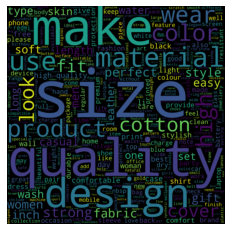

In [35]:
# a wordcliud to visualize most frequent features
wordcloud = WordCloud(width=3000, height = 3000, max_words = 500)
wordcloud.generate_from_frequencies(dict_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()

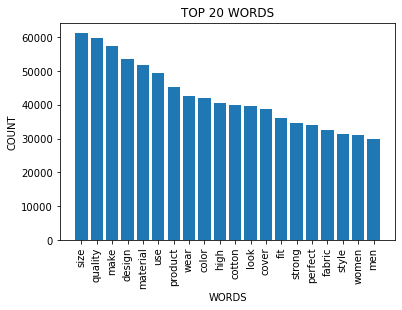

In [36]:
# count of top 20 words
plt.bar(features[0:20], count[0:20])
plt.xticks(rotation = 90)
plt.title("TOP 20 WORDS")
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.savefig('topWords.png')
plt.show()

In [37]:
bi_grams = [] # obtaining top bigrams
bi_grams_count = []
for i in range(len(features)):
    words = features[i].split()
    if(len(words) == 2):
        bi_grams.append(" ".join(words))
        bi_grams_count.append(count[i])
for i in range(len(bi_grams)):
    print(bi_grams[i], bi_grams_count[i])



high quality 22058
light weight 6021
regular fit 5355
care instructions 5332
stainless steel 5202
living room 5133
machine wash 5081
premium quality 5078
redmi redmi 4569
hand wash 4365
round neck 4257
party wear 4178
quality material 4101
wide range 4063
water resistant 4050
fabric cotton 3901
body cover 3857
wash care 3830
perfect gift 3701
size chart 3671
slim fit 3611
seat cover 3600
casual wear 3550
free size 3363
water bottle 3315
li ul 3232
samsung galaxy 3199
wall clock 3195
perfect fit 3194
material cotton 3091
laptop skin 3085
easy install 3073
complete look 3072
back cover 3071
may slightly 3043
best quality 3041
make high 3033
mobile phone 2983
redmi note 2899
comfortable wear 2896
size inch 2873
long lasting 2832
skin friendly 2829
women girls 2829
good quality 2801
half sleeve 2799
sterling silver 2788
cotton fabric 2788
home office 2787
cushion cover 2786
love one 2784
screen protector 2776
easy clean 2746
quality product 2719
daily wear 2705
genuine leather 2693
long la

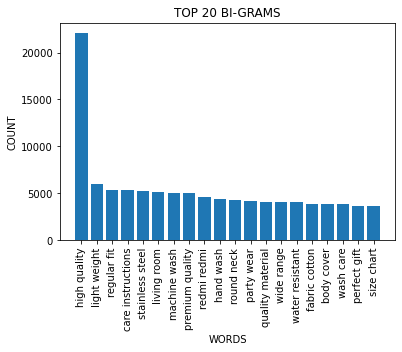

In [38]:
# count of top 20 bigrams
plt.bar(bi_grams[0:20], bi_grams_count[0:20])
plt.xticks(rotation = 90)
plt.title("TOP 20 BI-GRAMS")
plt.xlabel("WORDS")
plt.ylabel("COUNT")
plt.show()

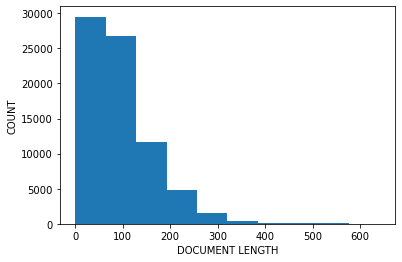

In [39]:
# a histogram depicting number of words in documents
documents_len = x_train.sum(axis=1)
documents_len = np.array(list(documents_len.values))

plt.hist(documents_len)
plt.xlabel("DOCUMENT LENGTH")
plt.ylabel("COUNT")
plt.show()

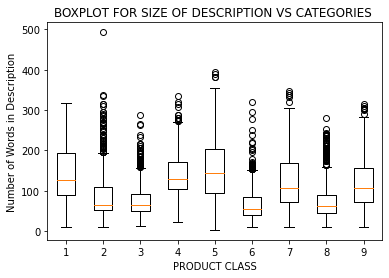

In [40]:
length = []
category = []
for i in range(1, 10):
    curr_index = (y_train == i)
    x_curr = x_train.iloc[curr_index]
    y_curr = y_train[curr_index]
    n = x_curr.shape[0]
    arr = []
    for j in range(n):
        arr.append(x_curr.iloc[j].sum())
    length.append(arr)
    category.append(i)
# a box plot representing variations of length of document vs categories
plt.boxplot(length)
plt.xlabel("PRODUCT CLASS")
plt.ylabel("Number of Words in Description")
plt.title("BOXPLOT FOR SIZE OF DESCRIPTION VS CATEGORIES ")
plt.show()

## RUNNING MODELS

In [41]:
#Random Forest Classifier
from yellowbrick.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier

In [42]:
x_train = pd.read_csv('df_train_2.csv')
x_test = pd.read_csv('df_test_2.csv')
y_train = pd.read_csv('y_train.csv', header = None)
y_train = np.array(y_train.values.reshape(-1), dtype = int)
y_test = pd.read_csv('y_test.csv', header = None)
y_test = np.array(y_test.values.reshape(-1), dtype = int)

In [43]:
# Random Forests with default parameters
rf1 = RandomForestClassifier()
rf1.fit(x_train, y_train)
print(rf1.score(x_train, y_train)) # training score
print(rf1.score(x_test, y_test)) # testing score

0.9984666666666666
0.88488


In [ ]:
"""
now validation curves are made to choose the best value of the parameters
"""

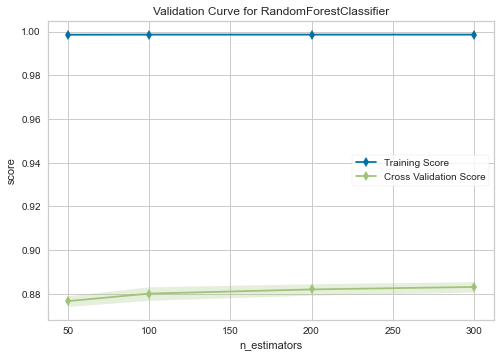

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='n_estimators',
                param_range=array([ 50, 100, 200, 300]), scoring='accuracy')


In [44]:
# changing number of trees
n_trees = [50,100,200,300]
print(validation_curve(RandomForestClassifier(), X = x_train, y = y_train, param_name = 'n_estimators',
                 param_range = n_trees, cv = 5, scoring = "accuracy", n_jobs=-1))

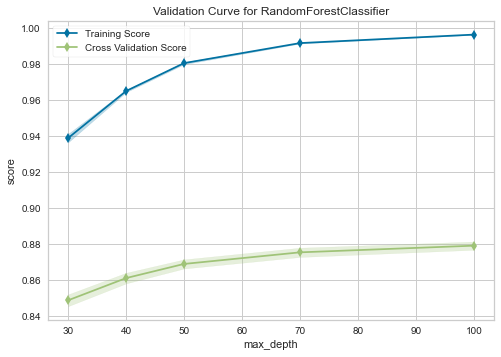

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='max_depth',
                param_range=array([ 30,  40,  50,  70, 100]),
                scoring='accuracy')


In [45]:
# changing max depth of tree
max_depth = [30,40, 50, 70, 100]
print(validation_curve(RandomForestClassifier(), X = x_train, y = y_train, param_name = 'max_depth',
                 param_range = max_depth, cv = 5, scoring = "accuracy", n_jobs=-1))

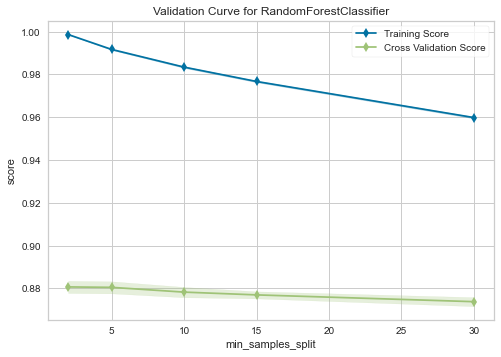

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='min_samples_split',
                param_range=array([ 2,  5, 10, 15, 30]), scoring='accuracy')


In [46]:
# changing min_sample_split
min_samples_split = [2,5,10,15,30]
print(validation_curve(RandomForestClassifier(), X = x_train, y = y_train, param_name = 'min_samples_split',
                 param_range = min_samples_split, cv = 5, scoring = "accuracy", n_jobs=-1))

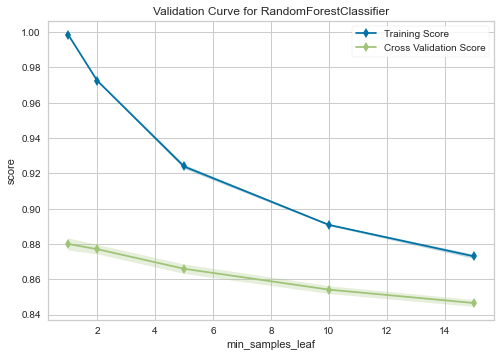

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_leaf', ylabel='score'>,
                cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                param_name='min_samples_leaf',
                param_range=array([ 1,  2,  5, 10, 15]), scoring='accuracy')


In [47]:
# changing min_sample_leaf
min_samples_leaf = [1,2,5,10,15]
print(validation_curve(RandomForestClassifier(), X = x_train, y = y_train, param_name = 'min_samples_leaf',
                 param_range = min_samples_leaf, cv = 5, scoring = "accuracy", n_jobs=-1))

In [48]:
"""
training with the obtained value of parameters
It can be observed that overfitting is not present when compared to the default parameters
"""
rf1 = RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_split = 5, min_samples_leaf=2)
rf1.fit(x_train, y_train)
print(rf1.score(x_train, y_train)) # training score
print(rf1.score(x_test, y_test)) # testing score

0.9661333333333333
0.87948


In [49]:
"""
Getting the predictions on training and testing data
"""
y_pred_train = rf1.predict(x_train)
y_pred_test = rf1.predict(x_test)

In [51]:
"""
Classification report on training data
"""
print("classification_report train")
print(classification_report(y_train, y_pred_train))

classification_report train
              precision    recall  f1-score   support

           1       0.95      0.95      0.95       735
           2       0.93      0.93      0.93       755
           3       0.96      0.99      0.98       779
           4       0.95      0.99      0.97       752
           5       0.98      0.99      0.99       767
           6       0.97      0.98      0.97       730
           7       0.99      0.99      0.99       743
           8       0.99      1.00      0.99       754
           9       0.99      0.99      0.99       741
          10       0.96      0.98      0.97       753
          11       0.96      0.96      0.96       738
          12       0.94      0.93      0.93       744
          13       1.00      0.99      1.00       742
          14       0.96      0.95      0.96       762
          15       0.97      0.97      0.97       769
          16       0.86      0.72      0.78       729
          17       0.96      0.96      0.96       729

In [52]:
"""
Classification report on testing data
"""
print("classification_report test")
print(classification_report(y_test, y_pred_test))

classification_report test
              precision    recall  f1-score   support

           1       0.80      0.86      0.83       265
           2       0.84      0.73      0.78       245
           3       0.93      0.98      0.95       221
           4       0.96      0.90      0.93       248
           5       0.91      0.97      0.94       233
           6       0.87      0.87      0.87       270
           7       0.95      0.93      0.94       257
           8       0.96      0.98      0.97       246
           9       0.98      0.98      0.98       259
          10       0.85      0.88      0.87       247
          11       0.83      0.87      0.85       262
          12       0.79      0.79      0.79       256
          13       0.98      0.99      0.98       258
          14       0.85      0.89      0.87       238
          15       0.60      0.65      0.62       231
          16       0.57      0.26      0.36       271
          17       0.87      0.86      0.86       271


In [57]:
"""
Decision Tree classifier with the best value of parameters
"""
dt1 = DecisionTreeClassifier(max_depth = 150, min_samples_split = 5, min_samples_leaf=1)
dt1.fit(x_train, y_train)
print(dt1.score(x_train, y_train)) # training score
print(dt1.score(x_test, y_test)) # testing score

0.9568
0.81276


In [58]:
#Decision Tree Classification Report
y_pred_train = dt1.predict(x_train)
y_pred_test = dt1.predict(x_test)


In [59]:
print("Decision Tree classification report:training")
print(classification_report(y_train, y_pred_train))

Decision Tree classification report:training
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       735
           2       0.92      0.97      0.94       755
           3       0.97      0.99      0.98       779
           4       0.97      0.98      0.98       752
           5       0.98      0.98      0.98       767
           6       0.93      0.97      0.95       730
           7       0.97      0.99      0.98       743
           8       0.98      0.99      0.98       754
           9       1.00      0.99      0.99       741
          10       0.89      0.96      0.92       753
          11       0.90      0.96      0.93       738
          12       0.91      0.91      0.91       744
          13       0.99      0.99      0.99       742
          14       0.92      0.96      0.94       762
          15       0.92      0.96      0.94       769
          16       0.38      0.93      0.54       729
          17       0.96      0.97   

In [60]:
print(("Decision Tree classification report:testing"))
print(classification_report(y_test, y_pred_test))

Decision Tree classification report:testing
              precision    recall  f1-score   support

           1       0.78      0.75      0.76       265
           2       0.76      0.71      0.74       245
           3       0.92      0.93      0.93       221
           4       0.93      0.86      0.89       248
           5       0.90      0.93      0.91       233
           6       0.75      0.79      0.77       270
           7       0.91      0.89      0.90       257
           8       0.94      0.96      0.95       246
           9       0.97      0.96      0.97       259
          10       0.69      0.77      0.73       247
          11       0.65      0.70      0.67       262
          12       0.63      0.64      0.64       256
          13       0.99      0.97      0.98       258
          14       0.71      0.79      0.75       238
          15       0.51      0.56      0.53       231
          16       0.16      0.37      0.23       271
          17       0.84      0.80    

In [61]:
"""
MLP classifier with default parameters
"""
clf = MLPClassifier()
clf.fit(x_train, y_train)

MLPClassifier()

In [62]:
"""
Score on training and testing data
"""
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.9958933333333333
0.85616


In [ ]:
param_grid = {'hidden_layer_sizes' : [(64, 32, )],
             'activation': ['tanh', 'relu', 'sigmoid'],
             'alpha': [0.0001, 0.001, 0.01], 
             'learning_rate_init' : [0.001, 0.01]}
clf = MLPClassifier()
grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", return_train_score=True, verbose=True)
grid_search.fit(x_train, y_train)

In [65]:
"""
MLP classifier with changed parameters
"""
clf = MLPClassifier(hidden_layer_sizes=[64, 32, ], activation='logistic', max_iter=150)
clf.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=[64, 32], max_iter=150)

In [66]:
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.99696
0.85592


In [ ]:
"""
It can be observed that both the neural networks are performing similarly and apperar to be overfitting
the training data
"""

In [80]:
#KNN 
clf_knn = KNeighborsClassifier()
clf_knn.fit(x_train, y_train)
# print("KNN-score")
# print("training score:" , clf_knn.score(x_train, y_train))
print("testing score:", clf_knn.score(x_test, y_test))

testing score: 0.75972


In [81]:
"""
Predictions using KNN
"""
# y_train_pred_knn = clf_knn.predict(x_train)
y_test_pred_knn = clf_knn.predict(x_test)


In [ ]:
print("Training data classification report")
print(classification_report(y_train, y_train_pred_knn))

In [82]:
print("Testing data classification report")
print(classification_report(y_test, y_test_pred_knn))

Testing data classification report
              precision    recall  f1-score   support

           1       0.75      0.77      0.76       265
           2       0.56      0.61      0.58       245
           3       0.84      0.91      0.88       221
           4       0.87      0.85      0.86       248
           5       0.86      0.95      0.90       233
           6       0.74      0.70      0.72       270
           7       0.91      0.89      0.90       257
           8       0.87      0.94      0.90       246
           9       0.96      0.91      0.93       259
          10       0.65      0.67      0.66       247
          11       0.64      0.69      0.66       262
          12       0.54      0.71      0.61       256
          13       0.99      0.93      0.96       258
          14       0.67      0.69      0.68       238
          15       0.36      0.45      0.40       231
          16       0.13      0.27      0.17       271
          17       0.72      0.80      0.76   

In [ ]:
"""
SVM classifier
"""
clf_svm = SVC()
clf_svm.fit(x_train, y_train)
train_score = clf_svm.score(x_train, y_train)
test_score = clf_svm.score(x_test, y_test)

In [ ]:
print("Training score:", train_score)
print("Testing score:", test_score)

In [ ]:
y_pred_train_svm = clf_svm.predict(x_train)
y_pred_test_svm = clf_svm.predict(x_test)

In [ ]:
print("Training data classification report")
print(classification_report(y_train, y_pred_train_svm))

In [ ]:
print("Testing data classification report")
print(classification_report(y_test, y_pred_test_svm))

## Saving Models

In [71]:
import joblib

In [75]:
#saving random forests model
joblib_file = "rf_model.pkl"  
joblib.dump(rf1, joblib_file)

['rf_model.pkl']

In [73]:
#saving mlp classifier 
joblib_file = "mlp_model.pkl"  
joblib.dump(clf, joblib_file)

['mlp_model.pkl']

In [74]:
#saving decision tree classifier 
joblib_file = "decisionTree_model.pkl"  
joblib.dump(dt1, joblib_file)

['decisionTree_model.pkl']

In [83]:
#saving knn 
joblib_file = "knn_model.pkl"  
joblib.dump(clf_knn, joblib_file)

['knn_model.pkl']

In [ ]:
#saving svm model
joblib_file = "svm_model.pkl"  
joblib.dump(clf_svm, joblib_file)